In [2]:
import pandas as pd

GO_df = pd.read_csv('data/norman/go.csv')
GO_df.head()

,source,target,importance
0,SAMD11,SAMD11,1.000000
1,SAMD11,PERM1,0.125000
2,SAMD11,HES4,0.153846
3,SAMD11,TNFRSF4,0.105263
4,SAMD11,CALML6,0.222222


In [3]:
print(GO_df['source'].nunique(), 'unique sources')
print(GO_df['target'].nunique(), 'unique targets')

3127 unique sources
3127 unique targets


In [4]:
import scanpy as sc
perturb_adata = sc.read_h5ad('data/norman/perturb_processed.h5ad')

c:\Users\rsore\anaconda3\envs\GEARS\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
c:\Users\rsore\anaconda3\envs\GEARS\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
c:\Users\rsore\anaconda3\envs\GEARS\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
c:\Users\rsore\anaconda3\envs\GEARS\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
c:\Users\rsore\anaconda3\envs\GEARS\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import

In [5]:
perturb_adata

AnnData object with n_obs × n_vars = 91205 × 5045
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'
    layers: 'counts'

In [6]:
perturb_adata.obs.head()

,condition,cell_type,dose_val,control,condition_name
cell_barcode,,,,,
AAACCTGAGGCATGTG-1,TSC22D1+ctrl,A549,1+1,0,A549_TSC22D1+ctrl_1+1
AAACCTGAGGCCCTTG-1,KLF1+MAP2K6,A549,1+1,0,A549_KLF1+MAP2K6_1+1
AAACCTGCACGAAGCA-1,ctrl,A549,1,1,A549_ctrl_1
AAACCTGCAGACGTAG-1,CEBPE+RUNX1T1,A549,1+1,0,A549_CEBPE+RUNX1T1_1+1
AAACCTGCAGCCTTGG-1,MAML2+ctrl,A549,1+1,0,A549_MAML2+ctrl_1+1


In [7]:
perturb_adata.var.head()

,gene_name
gene_id,
ENSG00000239945,RP11-34P13.8
ENSG00000223764,RP11-54O7.3
ENSG00000187634,SAMD11
ENSG00000187642,PERM1
ENSG00000188290,HES4


In [64]:
print(perturb_adata.uns.keys())
print()
for key in perturb_adata.uns:
    if key != 'top_non_dropout_de_20':
        print(f"{key}: {type(perturb_adata.uns[key])}")

dict_keys(['non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'])

non_dropout_gene_idx: <class 'dict'>
non_zeros_gene_idx: <class 'dict'>
rank_genes_groups_cov_all: <class 'dict'>
top_non_zero_de_20: <class 'dict'>


In [154]:
for key in perturb_adata.uns:
    print(key)

non_dropout_gene_idx
non_zeros_gene_idx
rank_genes_groups_cov_all
top_non_dropout_de_20
top_non_zero_de_20


In [67]:
sample_key = list(perturb_adata.uns['rank_genes_groups_cov_all'].keys())[0]
print(f"Sample DE data for: {sample_key}")
print(perturb_adata.uns['rank_genes_groups_cov_all'][sample_key])
print(f"Length of sample DE data: {len(perturb_adata.uns['rank_genes_groups_cov_all'][sample_key])}")

Sample DE data for: A549_AHR+FEV_1+1
['ENSG00000163497' 'ENSG00000142669' 'ENSG00000069482' ...
 'ENSG00000184672' 'ENSG00000104267' 'ENSG00000239945']
Length of sample DE data: 5045


In [8]:
gene_name_map = perturb_adata.var['gene_name']

de_dict = perturb_adata.uns['top_non_dropout_de_20']

for condition, gene_ids in de_dict.items():
    names = condition.split('_')[1]
    name1, name2 = names.split('+')
    print(f"\nTop 20 DE genes for knockout: {name1, name2}")
    for i, gene_id in enumerate(gene_ids, start=1):
        gene_name = gene_name_map.get(gene_id, "Unknown")
        print(f"{i}. {gene_name} ({gene_id})")



Top 20 DE genes for knockout: ('AHR', 'FEV')
1. FEV (ENSG00000163497)
2. SH3BGRL3 (ENSG00000142669)
3. GAL (ENSG00000069482)
4. HBG2 (ENSG00000196565)
5. PRSS57 (ENSG00000185198)
6. MT-ND4 (ENSG00000198886)
7. MYL6 (ENSG00000092841)
8. TESC (ENSG00000088992)
9. MALAT1 (ENSG00000251562)
10. MT-CYB (ENSG00000198727)
11. MT-ATP6 (ENSG00000198899)
12. FABP5 (ENSG00000164687)
13. MYB (ENSG00000118513)
14. MARCKSL1 (ENSG00000175130)
15. AC006262.5 (ENSG00000268621)
16. HBG1 (ENSG00000213934)
17. MT-CO3 (ENSG00000198938)
18. MYC (ENSG00000136997)
19. MT-ND2 (ENSG00000198763)
20. CRYBA2 (ENSG00000163499)

Top 20 DE genes for knockout: ('AHR', 'KLF1')
1. TMSB10 (ENSG00000034510)
2. HBZ (ENSG00000130656)
3. HBG2 (ENSG00000196565)
4. PNMT (ENSG00000141744)
5. KLF1 (ENSG00000105610)
6. HBA1 (ENSG00000206172)
7. ANXA2 (ENSG00000182718)
8. LGALS1 (ENSG00000100097)
9. HBG1 (ENSG00000213934)
10. S100A10 (ENSG00000197747)
11. EMP3 (ENSG00000142227)
12. S100A11 (ENSG00000163191)
13. SH3BGRL3 (ENSG00000

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gene_name_map = perturb_adata.var['gene_name']
de_dict = perturb_adata.uns['top_non_dropout_de_20']

# Dictionary to hold importance values keyed by (name1, name2)
importance_matrix = {}

for condition, gene_ids in de_dict.items():
    names = condition.split('_')[1]
    name1, name2 = names.split('+')
    gene_names = [gene_name_map.get(gid, "Unknown") for gid in gene_ids]

    # Filter GO_df for matching source and target, excluding source==target
    condition_go = GO_df[
        (GO_df['source'].isin([name1, name2])) &
        (GO_df['target'].isin(gene_names)) &
        (GO_df['source'] != GO_df['target'])
    ]

    avg_importance = condition_go['importance'].mean() if not condition_go.empty else 0

    # Save using (name1, name2)
    importance_matrix[(name1, name2)] = avg_importance


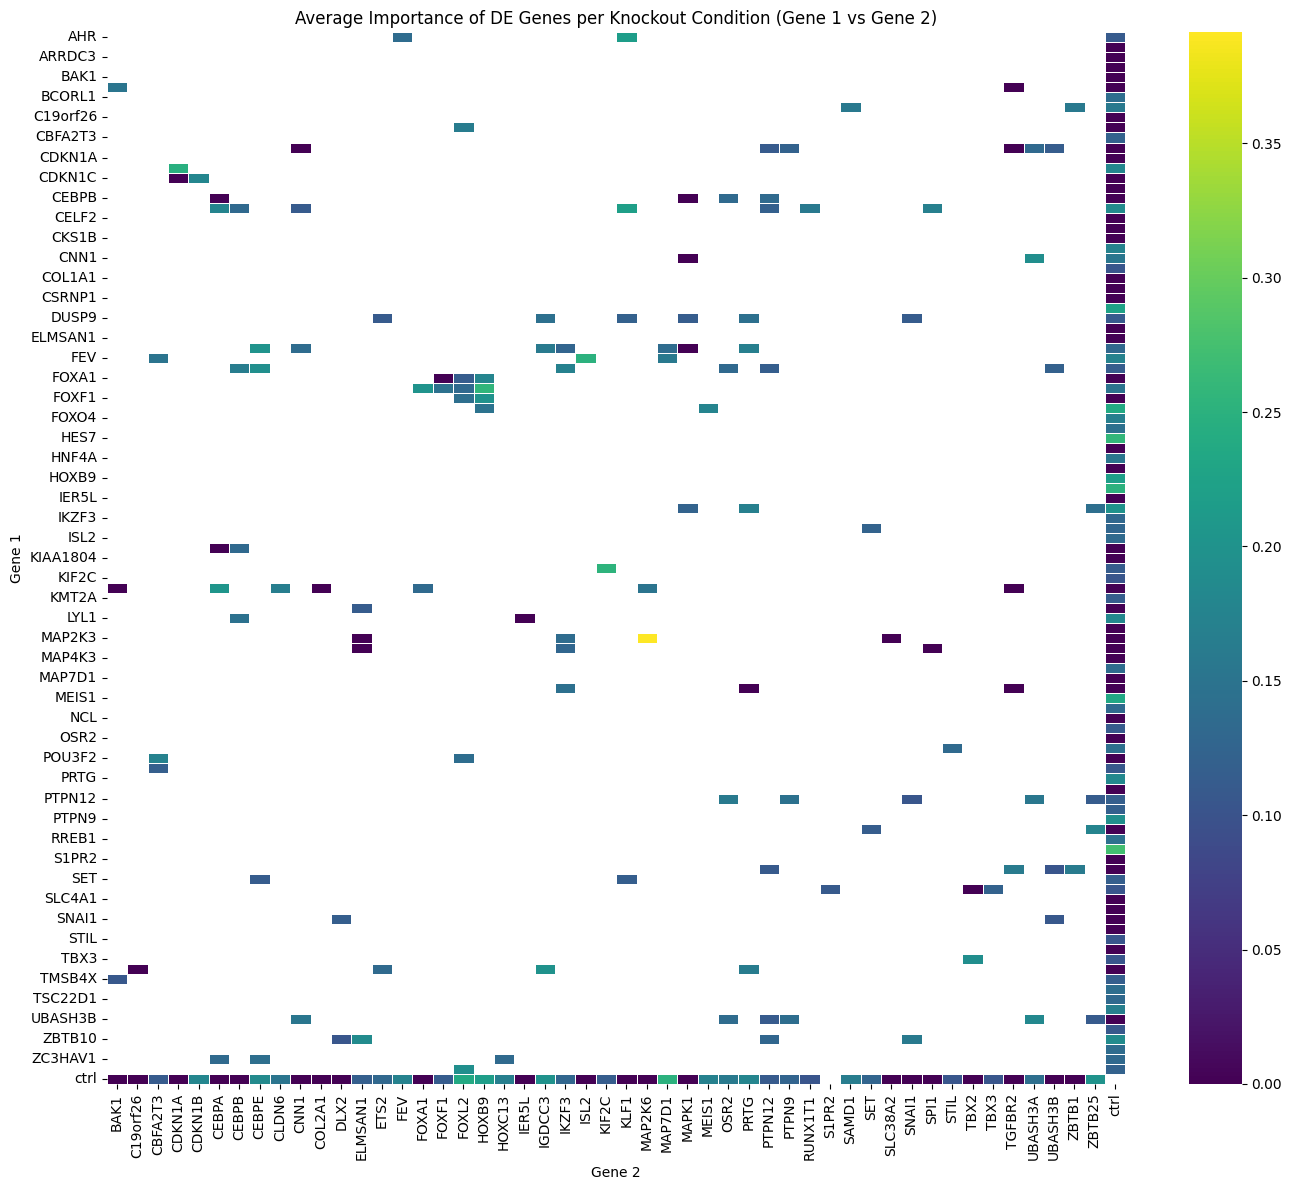

In [ ]:
# Convert to DataFrame for heatmap
heatmap_df = pd.DataFrame.from_dict(
    importance_matrix, orient='index', columns=['avg_importance']
).reset_index()

heatmap_df[['name1', 'name2']] = pd.DataFrame(heatmap_df['index'].tolist(), index=heatmap_df.index)
pivot_df = heatmap_df.pivot(index='name1', columns='name2', values='avg_importance')

# Fill missing values with nans
pivot_df = pivot_df.fillna(np.nan)

# Plotting
plt.figure(figsize=(14, 12))
sns.heatmap(pivot_df, annot=False, cmap='viridis', linewidths=0.5)
plt.title("Average Importance of DE Genes per Knockout Condition (Gene 1 vs Gene 2)")
plt.xlabel("Gene 2")
plt.ylabel("Gene 1")
plt.tight_layout()
plt.show()

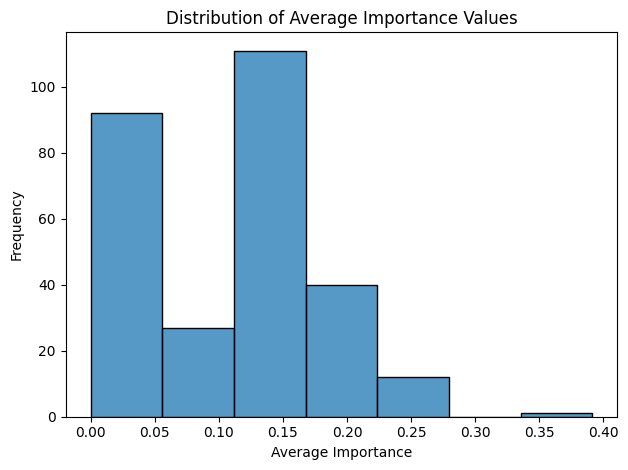

In [79]:
# plot the distribution in the importance_matrix
sns.histplot(list(importance_matrix.values()), bins=7)
plt.title("Distribution of Average Importance Values")
plt.xlabel("Average Importance")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### BioGRID Database
---

In [22]:
import requests
from collections import deque, defaultdict

BIOGRID_API_KEY = "c96e98ea2b2419dd9a3d53b0b6b6b7c6"

def resolve_to_official_symbol(gene):
    """Resolve a gene name to its official symbol using MyGene.info."""
    url = "https://mygene.info/v3/query"
    params = {
        "q": gene,
        "species": "human",
        "fields": "symbol",
        "limit": 1
    }
    try:
        r = requests.get(url, params=params, timeout=5)
        hits = r.json().get("hits", [])
        return hits[0]["symbol"].upper() if hits else gene.upper()
    except Exception as e:
        print(f"Error resolving {gene}: {e}")
        return gene.upper()
    
# Cache for API results to avoid redundant queries
interaction_cache = {}
def get_top_interactors(gene, top_n=None):
    gene_resolved = resolve_to_official_symbol(gene)
    
    if top_n is None and gene_resolved in interaction_cache:
        return interaction_cache[gene_resolved]

    url = "https://webservice.thebiogrid.org/interactions/"
    params = {
        "accesskey": BIOGRID_API_KEY,
        "searchNames": "true",
        "geneList": gene_resolved,
        "includeInteractors": "true",
        "format": "json",
        "includeHeader": "false",
        "taxId": "9606",
        "start": 0,
        "max": 10000
    }

    try:
        resp = requests.get(url, params=params, timeout=10)
        data = resp.json()
    except Exception as e:
        print(f"Error querying BioGRID for {gene}: {e}")
        interaction_cache[gene_resolved] = []
        return []

    if not isinstance(data, dict):
        interaction_cache[gene_resolved] = []
        return []

    interaction_counts = defaultdict(int)
    for interaction in data.values():
        a = interaction.get('OFFICIAL_SYMBOL_A', '').upper()
        b = interaction.get('OFFICIAL_SYMBOL_B', '').upper()
        partner = None
        if a == gene_resolved:
            partner = b
        elif b == gene_resolved:
            partner = a
        if partner:
            interaction_counts[partner] += 1

    sorted_partners = sorted(interaction_counts.items(), key=lambda x: -x[1])
    top_partners = [gene for gene, count in sorted_partners[:top_n]] if top_n else [gene for gene, count in sorted_partners]

    if top_n is None:
        interaction_cache[gene_resolved] = top_partners

    return top_partners


In [28]:
gene_name_map = perturb_adata.var['gene_name']
de_dict = perturb_adata.uns['top_non_dropout_de_20']

overlap_matrix = {}  # (name1, name2): count of DE genes found in interactions

max_conditions = 1000

for idx, (condition, gene_ids) in enumerate(de_dict.items()):
    if idx >= max_conditions:
        break

    name1, name2 = condition.split('_')[1].split('+')
    interactions1 = set(get_top_interactors(name1))
    interactions2 = set(get_top_interactors(name2))

    knockout_DE_genes = [
        resolve_to_official_symbol(gene_name_map.get(gene_id, "Unknown"))
        for gene_id in gene_ids
    ]

    genes_found_in_either = interactions1 | interactions2
    filtered_genes = [gene for gene in knockout_DE_genes if gene in genes_found_in_either]

    overlap_count = len(filtered_genes)
    overlap_matrix[(name1, name2)] = overlap_count

    print(f"Condition: {condition}, Knockout DE Genes found in either interaction set: {filtered_genes}")

Condition: A549_AHR+FEV_1+1, Knockout DE Genes found in either interaction set: []
Condition: A549_AHR+KLF1_1+1, Knockout DE Genes found in either interaction set: []
Condition: A549_AHR+ctrl_1+1, Knockout DE Genes found in either interaction set: ['AHR']
Condition: A549_ARID1A+ctrl_1+1, Knockout DE Genes found in either interaction set: []
Condition: A549_ARRDC3+ctrl_1+1, Knockout DE Genes found in either interaction set: []
Condition: A549_ATL1+ctrl_1+1, Knockout DE Genes found in either interaction set: []
Condition: A549_BAK1+ctrl_1+1, Knockout DE Genes found in either interaction set: ['BAK1']
Condition: A549_BCL2L11+BAK1_1+1, Knockout DE Genes found in either interaction set: ['BCL2L11']
Condition: A549_BCL2L11+TGFBR2_1+1, Knockout DE Genes found in either interaction set: []
Condition: A549_BCL2L11+ctrl_1+1, Knockout DE Genes found in either interaction set: []
Condition: A549_BCORL1+ctrl_1+1, Knockout DE Genes found in either interaction set: []
Condition: A549_BPGM+SAMD1_1+1, 

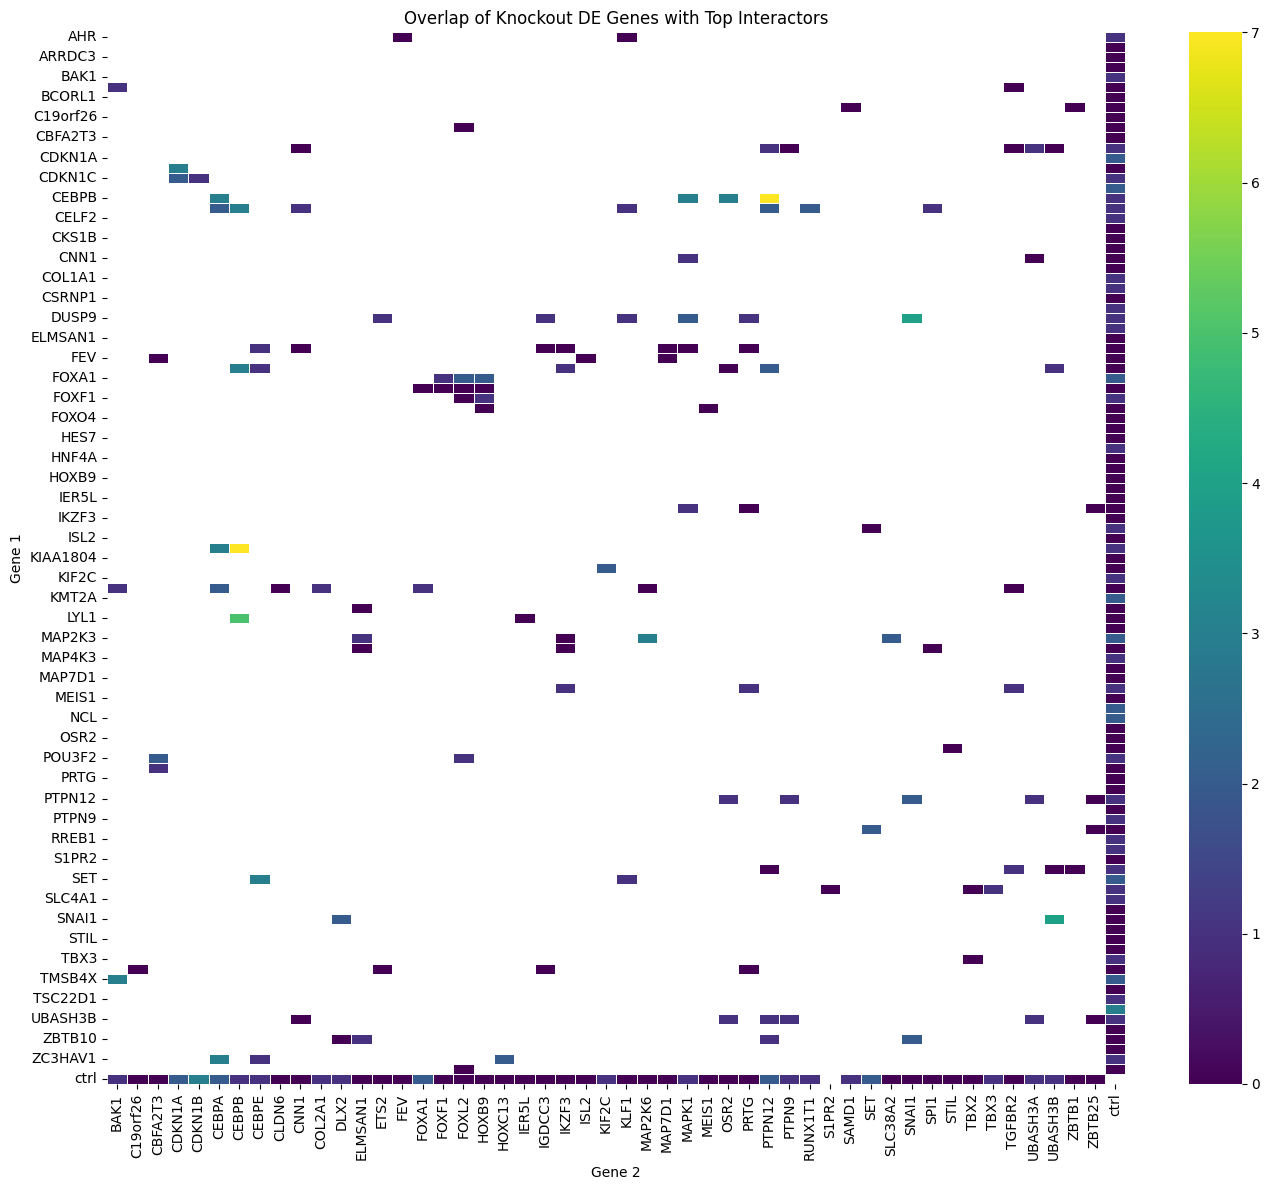

In [110]:
# Convert to DataFrame
heatmap_df = pd.DataFrame.from_dict(
    overlap_matrix, orient='index', columns=['overlap_count']
).reset_index()

heatmap_df[['name1', 'name2']] = pd.DataFrame(heatmap_df['index'].tolist(), index=heatmap_df.index)

# Create pivot table
pivot_df = heatmap_df.pivot(index='name1', columns='name2', values='overlap_count')
pivot_df = pivot_df.fillna(np.nan)

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(pivot_df, annot=False, cmap='viridis', linewidths=0.5)
plt.title("Overlap of Knockout DE Genes with Top Interactors")
plt.xlabel("Gene 2")
plt.ylabel("Gene 1")
plt.tight_layout()
plt.show()


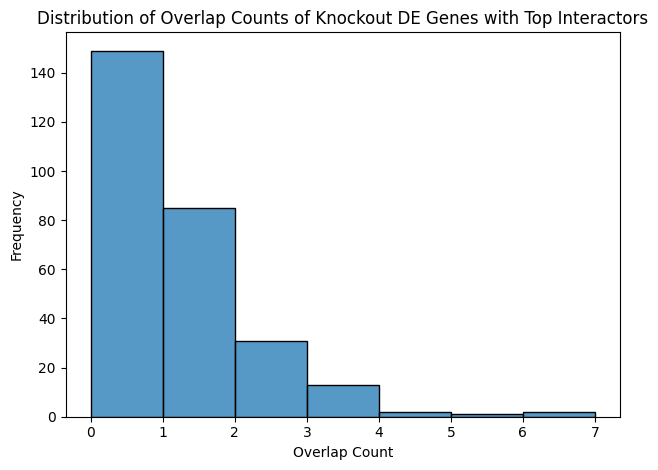

In [ ]:
sns.histplot(list(overlap_matrix.values()), bins=7)
plt.title("Distribution of Overlap Counts of Knockout DE Genes with Top Interactors")
plt.xlabel("Overlap Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### BioGRID Database Interactor BFS
---

In [104]:
def bfs_distance(source_gene, target_genes, max_depth=4, top_n=None):
    """
    BFS traversal to compute shortest distance from source_gene
    to each gene in target_genes.

    Only considers genes in perturb_adata.var['gene_name']
    """
    source = resolve_to_official_symbol(source_gene)
    target_set = set(target_genes)
    seen = set([source])
    queue = deque([(source, 0)])
    distances = {}
    valid_genes = set(perturb_adata.var['gene_name'].values)

    while queue:
        current_gene, depth = queue.popleft()
        # print progress of bfs
        print(' ' * 50, end='\r')
        print(f"Processing {current_gene} at depth {depth}...", end='\r')

        if depth > max_depth:
            break

        if current_gene in target_set and current_gene not in distances:
            distances[current_gene] = depth
            if len(distances) == len(target_genes):
                break

        for neighbor in get_top_interactors(current_gene, top_n=top_n):
            if neighbor in valid_genes and neighbor not in seen:
                seen.add(neighbor)
                queue.append((neighbor, depth + 1))

    return distances

In [105]:
# parameters to control the number of conditions processed, maximum depth of BFS, and number of interactors returned
max_conditions = 1000
max_depth = 2
top_n = 100

# List to store distances for each condition
knockout_gene_distances = []

gene_name_map = perturb_adata.var['gene_name']
de_dict = perturb_adata.uns['top_non_dropout_de_20']

for idx, (condition, gene_ids) in enumerate(de_dict.items()):
    if idx >= max_conditions:
        break

    name1, name2 = condition.split('_')[1].split('+')
    knockout_DE_genes = [resolve_to_official_symbol(gene_name_map.get(gid, "Unknown")) for gid in gene_ids]
    knockout_DE_genes = list(set(knockout_DE_genes))  # remove duplicates

    # Run BFS from both name1 and name2
    distances_name1 = bfs_distance(name1, knockout_DE_genes, max_depth=max_depth, top_n=top_n)
    distances_name2 = bfs_distance(name2, knockout_DE_genes, max_depth=max_depth, top_n=top_n)

    # Create a unique dataframe for the condition
    data = []
    for gene in knockout_DE_genes:
        dist1 = distances_name1.get(gene, None)
        dist2 = distances_name2.get(gene, None)
        data.append({
            "gene": gene,
            "distance_to_" + name1: dist1,
            "distance_to_" + name2: dist2
        })

    df = pd.DataFrame(data)
    knockout_gene_distances.append((condition, df))

    print(f"Processed condition: {condition}, DE genes: {len(df)}")

Processed condition: A549_AHR+FEV_1+1, DE genes: 20
Processed condition: A549_AHR+KLF1_1+1, DE genes: 20
Processed condition: A549_AHR+ctrl_1+1, DE genes: 20
Processed condition: A549_ARID1A+ctrl_1+1, DE genes: 20
Processed condition: A549_ARRDC3+ctrl_1+1, DE genes: 20
Processed condition: A549_ATL1+ctrl_1+1, DE genes: 20
Processed condition: A549_BAK1+ctrl_1+1, DE genes: 20
Processed condition: A549_BCL2L11+BAK1_1+1, DE genes: 20
Processed condition: A549_BCL2L11+TGFBR2_1+1, DE genes: 20
Processed condition: A549_BCL2L11+ctrl_1+1, DE genes: 20
Processed condition: A549_BCORL1+ctrl_1+1, DE genes: 20
Processed condition: A549_BPGM+SAMD1_1+1, DE genes: 20
Processed condition: A549_BPGM+ZBTB1_1+1, DE genes: 20
Processed condition: A549_BPGM+ctrl_1+1, DE genes: 20
Processed condition: A549_C19orf26+ctrl_1+1, DE genes: 20
Processed condition: A549_C3orf72+FOXL2_1+1, DE genes: 20
Processed condition: A549_C3orf72+ctrl_1+1, DE genes: 20
Processed condition: A549_CBFA2T3+ctrl_1+1, DE genes: 20

In [112]:
# For testing, display the first condition's distances
knockout_gene_distances[0][1]

,gene,distance_to_AHR,distance_to_FEV
0,GAL,NaN,NaN
1,CRYBA2,NaN,NaN
2,MARCKSL1,NaN,NaN
3,MYL6,NaN,NaN
4,FABP5,NaN,NaN
5,MT-CO3,NaN,NaN
6,TESC,NaN,NaN
7,HBG1,NaN,NaN
8,MT-ND4,NaN,NaN
9,MYC,2.0,2.0


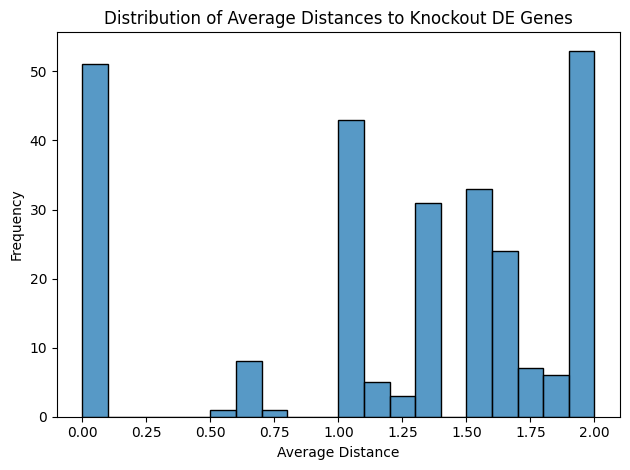

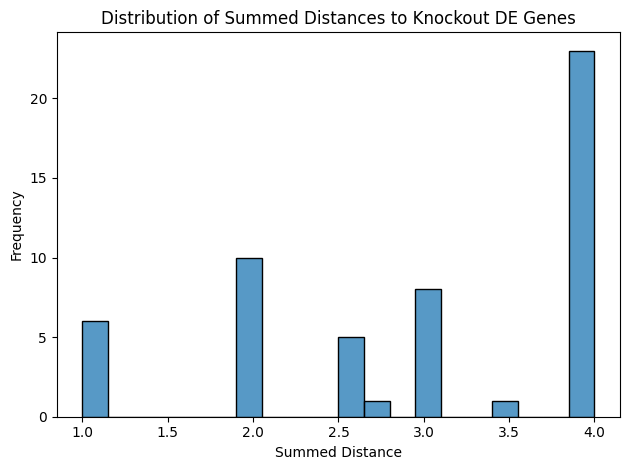

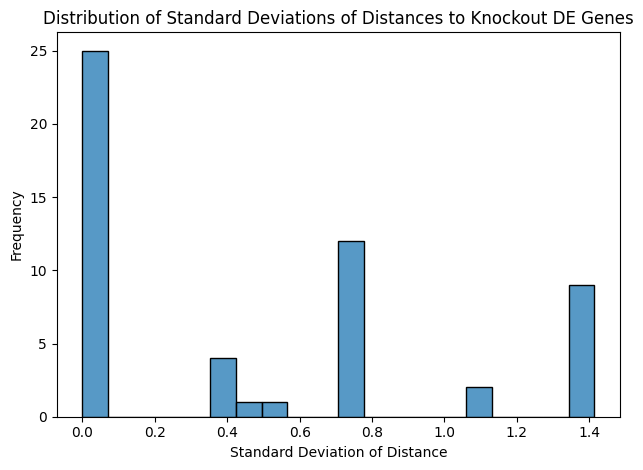

In [141]:
# Plot the distribution of average distances to knockout DE genes
average_distances = []
for condition, df in knockout_gene_distances:
    name1, name2 = condition.split('_')[1].split('+')
    combined_mean = df[[f'distance_to_{name1}', f'distance_to_{name2}']].mean(axis=1).mean()
    average_distances.append((condition, combined_mean))

average_distances_df = pd.DataFrame(average_distances, columns=['condition', 'average_distance'])
sns.histplot(average_distances_df['average_distance'], bins=20)
plt.title("Distribution of Average Distances to Knockout DE Genes")
plt.xlabel("Average Distance")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot the distribution of summed distances to knockout DE genes
average_distances = []
for condition, df in knockout_gene_distances:
    name1, name2 = condition.split('_')[1].split('+')
    combined_sum = df[f'distance_to_{name1}'] + df[f'distance_to_{name2}']
    combined_mean = combined_sum.mean()
    average_distances.append((condition, combined_mean))

average_distances_df = pd.DataFrame(average_distances, columns=['condition', 'summed_distance'])
sns.histplot(average_distances_df['summed_distance'], bins=20)
plt.title("Distribution of Summed Distances to Knockout DE Genes")
plt.xlabel("Summed Distance")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot the distribution of standard deviations of distances to knockout DE genes
std_distances = []
for condition, df in knockout_gene_distances:
    name1, name2 = condition.split('_')[1].split('+')
    combined_std = df[[f'distance_to_{name1}', f'distance_to_{name2}']].std(axis=1).mean()
    std_distances.append((condition, combined_std))
    
std_distances_df = pd.DataFrame(std_distances, columns=['condition', 'std_distance'])
sns.histplot(std_distances_df['std_distance'], bins=20)
plt.title("Distribution of Standard Deviations of Distances to Knockout DE Genes")
plt.xlabel("Standard Deviation of Distance")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


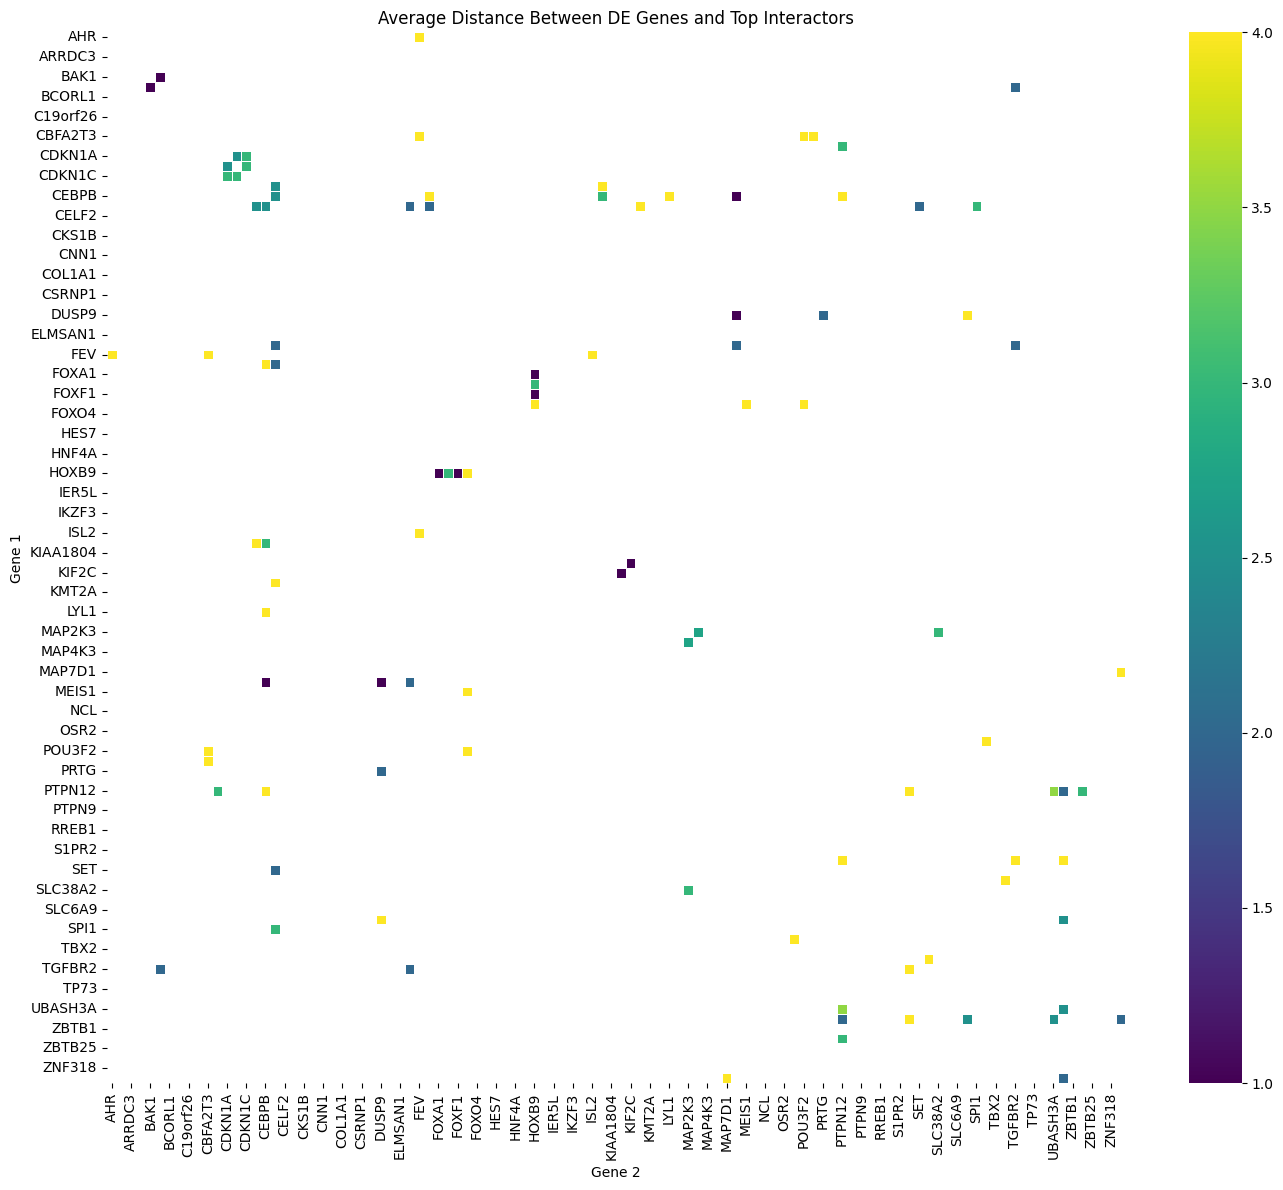

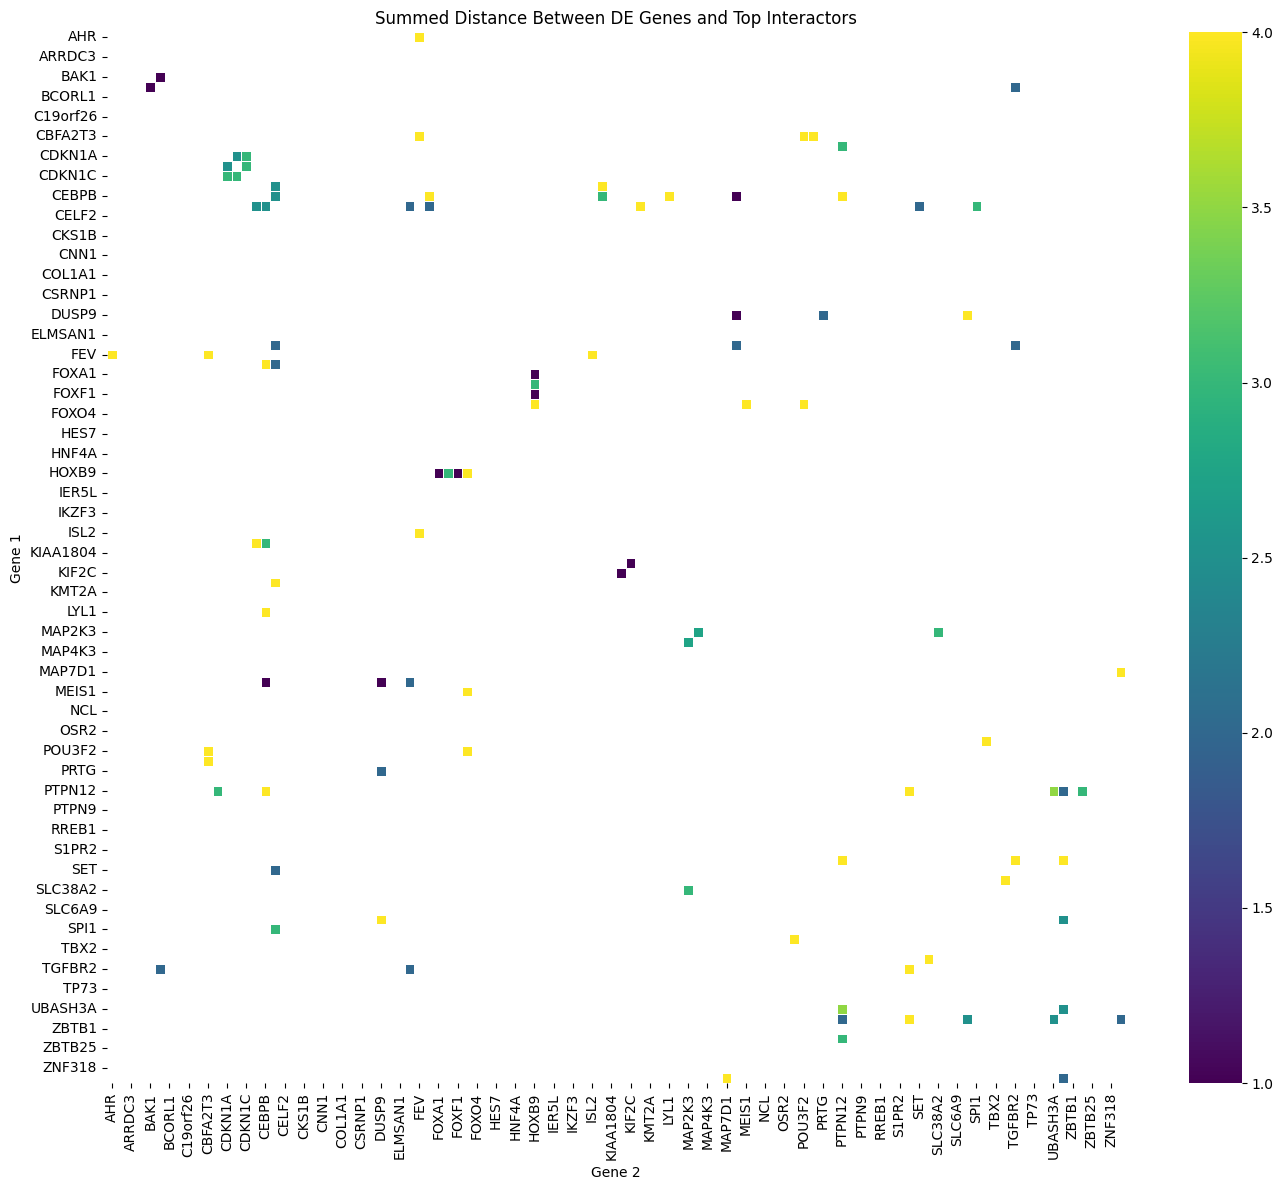

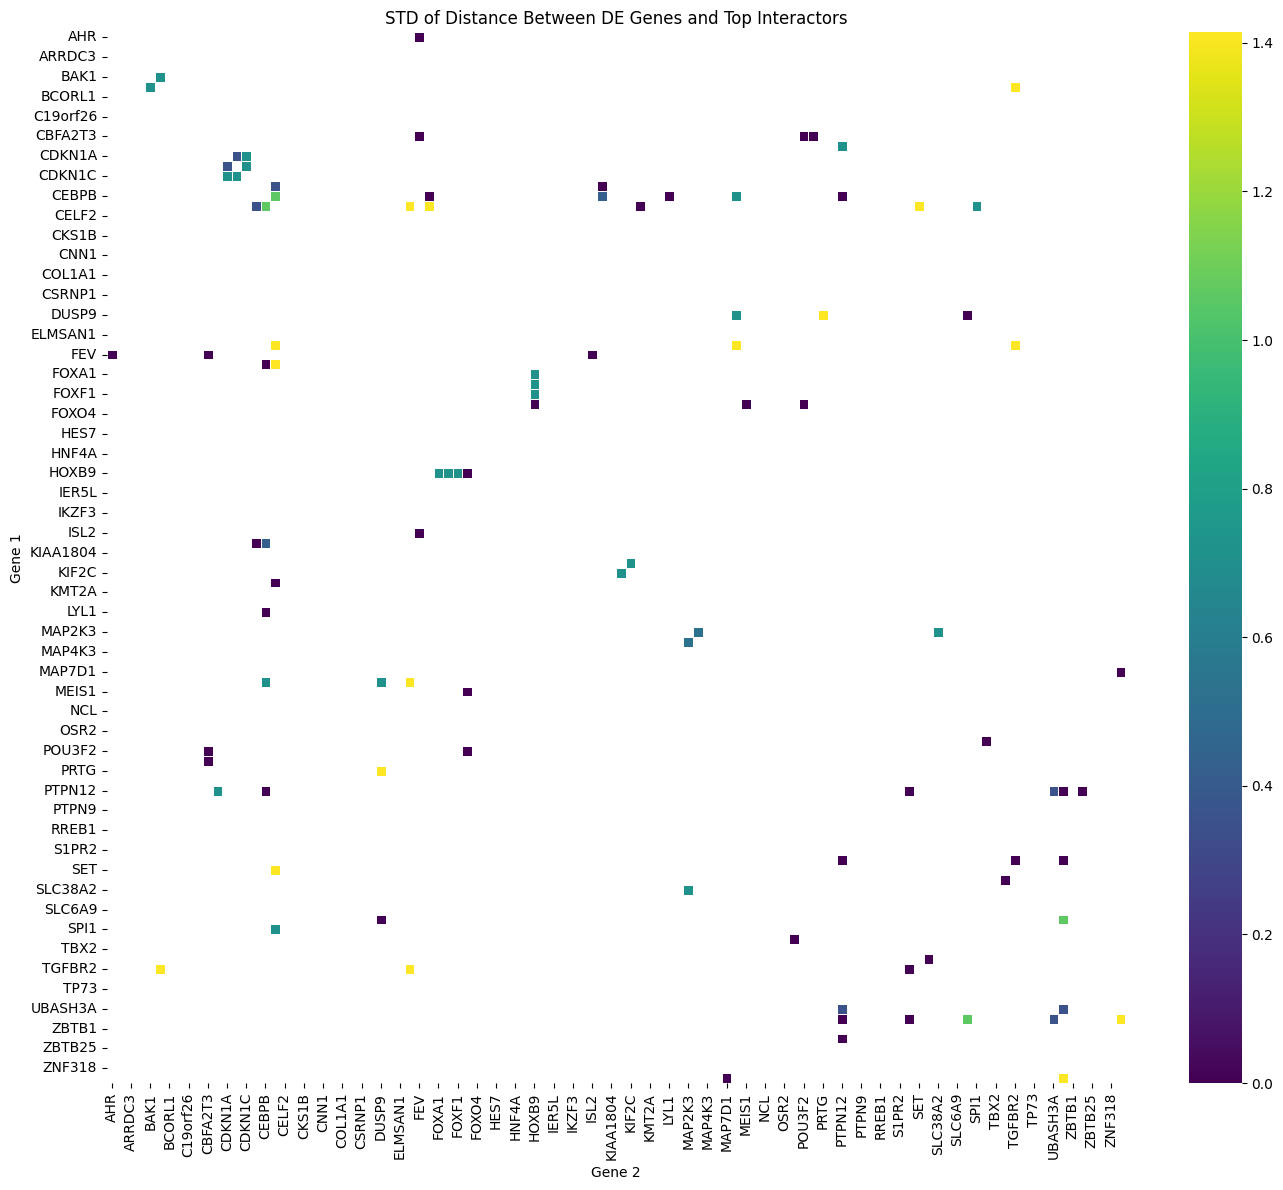

In [157]:
gene_pairs = [condition.split('_')[1].split('+') for condition, _ in average_distances]
gene_names = sorted(set(g for pair in gene_pairs for g in pair))

heatmap_matrix = pd.DataFrame(np.nan, index=gene_names, columns=gene_names)

# Calculate average distances
for condition, avg in average_distances:
    name1, name2 = condition.split('_')[1].split('+')
    heatmap_matrix.loc[name1, name2] = avg
    heatmap_matrix.loc[name2, name1] = avg

# Plot heatmap for average distances
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_matrix, annot=False, cmap='viridis', linewidths=0.5)
plt.title("Average Distance Between DE Genes and Top Interactors")
plt.xlabel("Gene 2")
plt.ylabel("Gene 1")
plt.tight_layout()
plt.show()

# Calculate summed distances
for condition, df in knockout_gene_distances:
    name1, name2 = condition.split('_')[1].split('+')
    summed_distance = df[f'distance_to_{name1}'] + df[f'distance_to_{name2}']
    heatmap_matrix.loc[name1, name2] = summed_distance.mean()
    heatmap_matrix.loc[name2, name1] = summed_distance.mean()
    
# Plot heatmap for summed distances
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_matrix, annot=False, cmap='viridis', linewidths=0.5)
plt.title("Summed Distance Between DE Genes and Top Interactors")
plt.xlabel("Gene 2")
plt.ylabel("Gene 1")
plt.tight_layout()
plt.show()

# Calculate distance std
heatmap_std_matrix = pd.DataFrame(np.nan, index=gene_names, columns=gene_names)
for condition, std in std_distances:
    name1, name2 = condition.split('_')[1].split('+')
    heatmap_std_matrix.loc[name1, name2] = std
    heatmap_std_matrix.loc[name2, name1] = std

# Plot heatmap for standard deviations
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_std_matrix, annot=False, cmap='viridis', linewidths=0.5)
plt.title("STD of Distance Between DE Genes and Top Interactors")
plt.xlabel("Gene 2")
plt.ylabel("Gene 1")
plt.tight_layout()
plt.show()

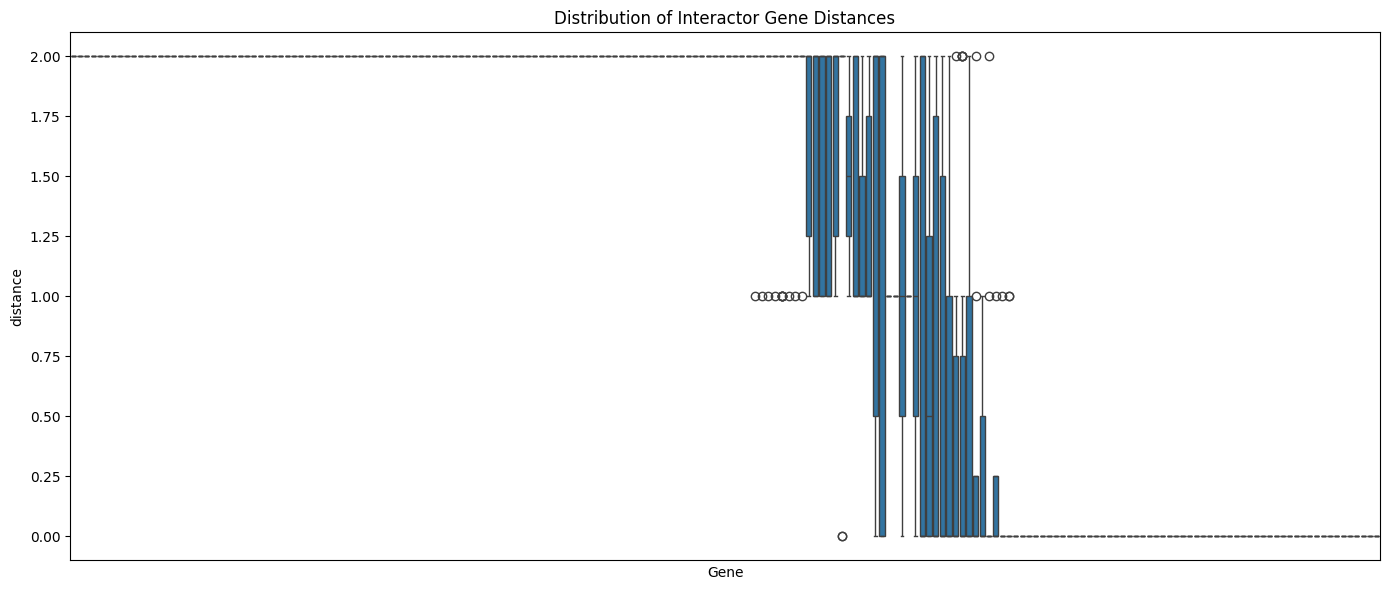

In [130]:
records = []

for condition, df in knockout_gene_distances:
    for _, row in df.iterrows():
        gene = row['gene']
        dist1 = row[df.columns[1]] # distance_to_name1
        dist2 = row[df.columns[2]] # distance_to_name2

        if pd.notnull(dist1):
            records.append({"gene": gene, "distance": dist1})
        if pd.notnull(dist2):
            records.append({"gene": gene, "distance": dist2})

all_distances_df = pd.DataFrame(records)

avg_distances = all_distances_df.groupby("gene")["distance"].mean().sort_values(ascending=False)

sorted_genes = avg_distances.index.tolist()

plt.figure(figsize=(14, 6))
sns.boxplot(data=all_distances_df, x="gene", y="distance", order=sorted_genes)
plt.xlabel("Gene")
plt.xticks([], [])
plt.title("Distribution of Interactor Gene Distances")
plt.tight_layout()
plt.show()

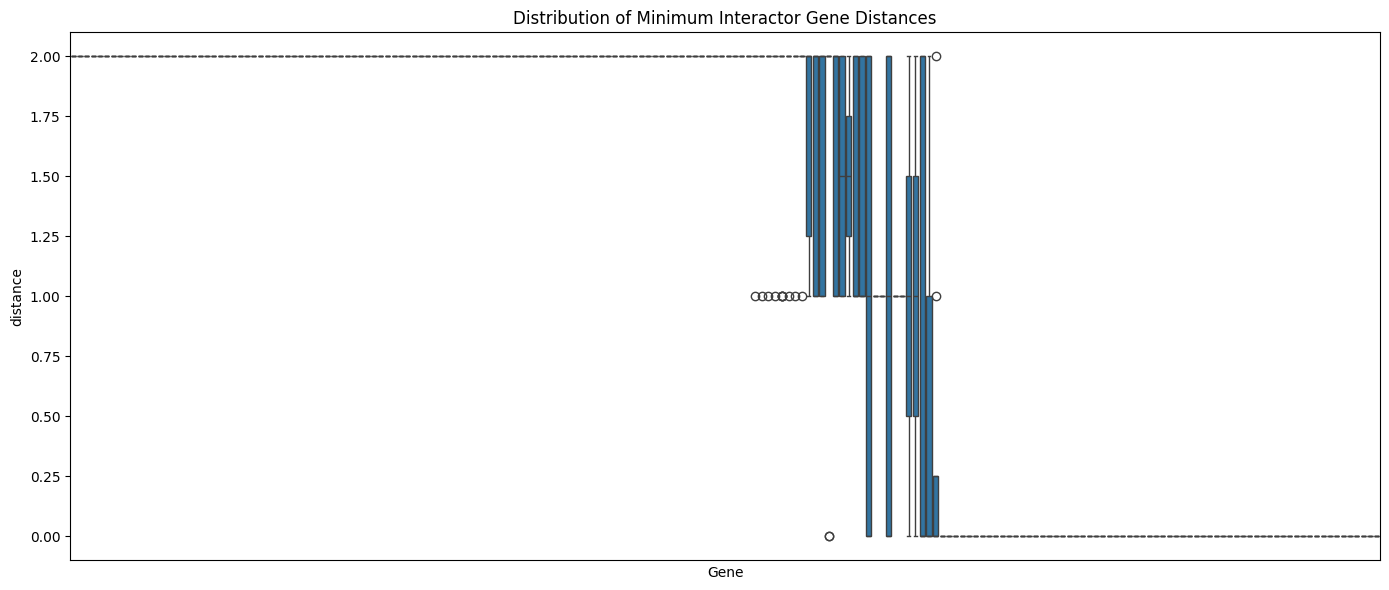

In [131]:
records = []

for condition, df in knockout_gene_distances:
    for _, row in df.iterrows():
        gene = row['gene']
        dist1 = row[df.columns[1]]  # distance_to_name1
        dist2 = row[df.columns[2]]  # distance_to_name2

        # Use the minimum distance if at least one is not null
        if pd.notnull(dist1) or pd.notnull(dist2):
            min_dist = min(
                [d for d in [dist1, dist2] if pd.notnull(d)]
            )
            records.append({"gene": gene, "distance": min_dist})

all_distances_df = pd.DataFrame(records)

avg_distances = all_distances_df.groupby("gene")["distance"].mean().sort_values(ascending=False)

sorted_genes = avg_distances.index.tolist()

plt.figure(figsize=(14, 6))
sns.boxplot(data=all_distances_df, x="gene", y="distance", order=sorted_genes)
plt.xlabel("Gene")
plt.xticks([], [])
plt.title("Distribution of Minimum Interactor Gene Distances")
plt.tight_layout()
plt.show()

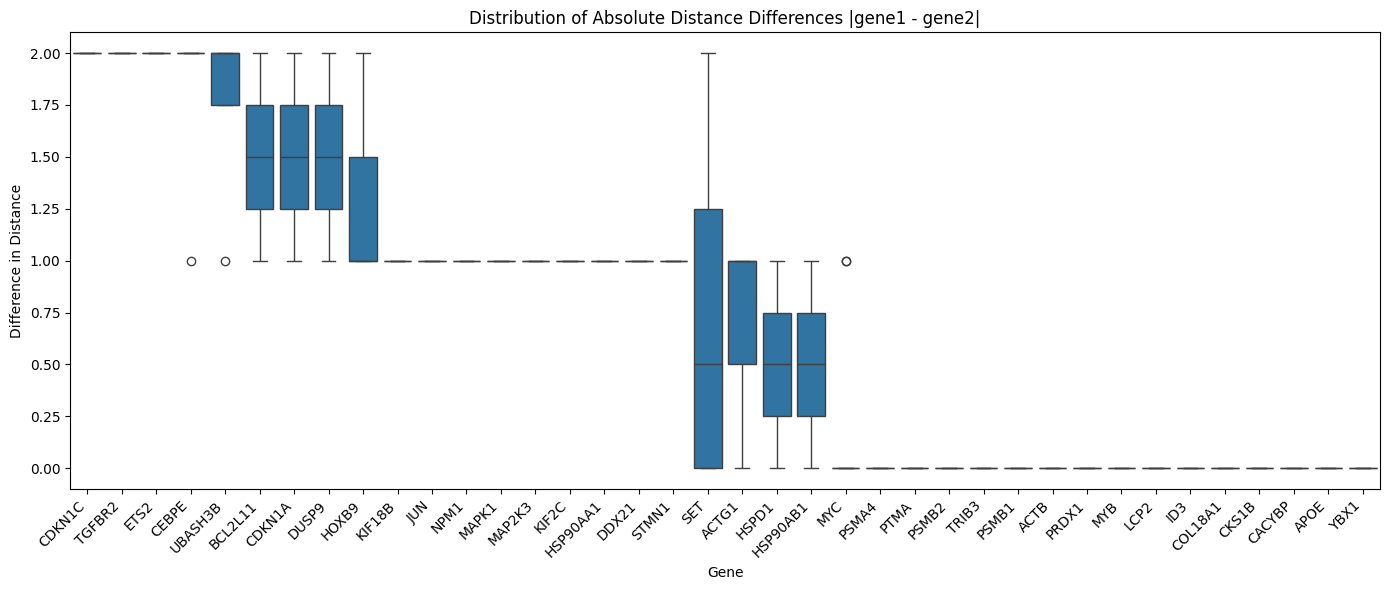

In [139]:
records = []

for condition, df in knockout_gene_distances:
    for _, row in df.iterrows():
        gene = row['gene']
        dist1 = row[df.columns[1]]  # distance_to_gene1
        dist2 = row[df.columns[2]]  # distance_to_gene2

        if pd.notnull(dist1) and pd.notnull(dist2):
            diff = abs(dist1 - dist2)
            records.append({
                "gene": gene,
                "distance_difference": diff,
                "condition": condition
            })

diff_df = pd.DataFrame(records)

avg_diffs = diff_df.groupby("gene")["distance_difference"].mean().sort_values(ascending=False)
sorted_genes = avg_diffs.index.tolist()

plt.figure(figsize=(14, 6))
sns.boxplot(data=diff_df, x="gene", y="distance_difference", order=sorted_genes)
plt.xlabel("Gene")
plt.ylabel("Difference in Distance")
plt.title("Distribution of Absolute Distance Differences |gene1 - gene2|")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### BioGRID Database Interactor BFS, only for AHR/FEV condition
---

In [150]:
# parameters to control the number of conditions processed, maximum depth of BFS, and number of interactors returned
max_conditions = 1
max_depth = 4
top_n = 100

# Run BFS on only the first condition
target_condition = 'A549_AHR+FEV_1+1'

gene_name_map = perturb_adata.var['gene_name']
de_dict = perturb_adata.uns['top_non_dropout_de_20']

name1, name2 = target_condition.split('_')[1].split('+')
knockout_DE_genes = [resolve_to_official_symbol(gene_name_map.get(gid, "Unknown")) for gid in gene_ids]
knockout_DE_genes = list(set(knockout_DE_genes))  # remove duplicates

# Run BFS from both name1 and name2
distances_name1 = bfs_distance(name1, knockout_DE_genes, max_depth=max_depth, top_n=top_n)
distances_name2 = bfs_distance(name2, knockout_DE_genes, max_depth=max_depth, top_n=top_n)

# Create a unique dataframe for the condition
data = []
for gene in knockout_DE_genes:
    dist1 = distances_name1.get(gene, None)
    dist2 = distances_name2.get(gene, None)
    data.append({
        "gene": gene,
        "distance_to_" + name1: dist1,
        "distance_to_" + name2: dist2
    })

AHR_FEV_df = pd.DataFrame(data)

print(f"Processed condition: {condition}, DE genes: {len(df)}")

Error resolving GADD45G: HTTPSConnectionPool(host='mygene.info', port=443): Read timed out. (read timeout=5)
Processed condition: A549_ctrl+ZBTB25_1+1, DE genes: 20


In [152]:
# Display 2-deep DFS for AHR_FEV
knockout_gene_distances[0][1]

,gene,distance_to_AHR,distance_to_FEV
0,GAL,NaN,NaN
1,CRYBA2,NaN,NaN
2,MARCKSL1,NaN,NaN
3,MYL6,NaN,NaN
4,FABP5,NaN,NaN
5,MT-CO3,NaN,NaN
6,TESC,NaN,NaN
7,HBG1,NaN,NaN
8,MT-ND4,NaN,NaN
9,MYC,2.0,2.0


In [151]:
# Display 4-deep DFS for AHR_FEV
AHR_FEV_df

,gene,distance_to_AHR,distance_to_FEV
0,SLC25A37,NaN,NaN
1,PHF19,4.0,4.0
2,TMEM54,4.0,4.0
3,COMT,4.0,4.0
4,TMSB4X,4.0,3.0
5,MDK,4.0,3.0
6,LGALS1,3.0,4.0
7,HBZ,3.0,4.0
8,MIR4458HG,NaN,NaN
9,LCP2,3.0,4.0


### Save and Load The Data
---

In [126]:
import json
import pickle

# Save interactor cache to file
with open('interaction_cache.json', 'w') as f:
        json.dump(interaction_cache, f)

# Save the BFS knockout_gene_distances to file
with open('knockout_gene_distances.pkl', 'wb') as f:
        pickle.dump(knockout_gene_distances, f)

In [137]:
# Load the interactor cache from file
with open('interaction_cache.json', 'r') as f:
    interaction_cache = json.load(f)

# Load the BFS knockout_gene_distances from file
with open('knockout_gene_distances.pkl', 'rb') as f:
    knockout_gene_distances = pickle.load(f)